In [1]:
# Import all the stuff
import matplotlib
from sklearn import datasets, model_selection, metrics
from sklearn.linear_model import LinearRegression
from pandas import DataFrame
from seaborn import regplot

In [2]:
# Load the Diabetes dataset 
raw_data = datasets.load_diabetes()
diabetes = DataFrame(data=raw_data.data, columns=raw_data.feature_names)
diabetes.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019908 -0.017646  
1 -0.039493 -0.068330 -0.092204  
2 -0.002592  0.002864 -0.025930  
3  0.034309  0.022692 -0.009362  
4 -0.002592 -0.031991 -0.046641

In [3]:
# Create a training and test set using all features
train_x, test_x, train_y, test_y = model_selection.train_test_split(diabetes, raw_data.target)

In [4]:
# Fit a linear regression model on the training set using the bmi feature only. 
reg = LinearRegression().fit([[val] for val in train_x.bmi], train_y)

In [5]:
# Show regression coefficients
coef = reg.coef_
inter = reg.intercept_
print(f'coef: {coef}, intercept: {inter}')

coef: [971.13079806], intercept: 149.68545133621987


In [6]:
# Predict response for the test set using the bmi feature.
result = reg.predict([[val] for val in test_x.bmi])

In [7]:
# Show some performance metrics (MSE and R²)
mse = metrics.mean_squared_error(test_y, result)
r2 = metrics.r2_score(test_y, result)
print(f'mean_squared_error: {mse}, r2_score: {r2}')

mean_squared_error: 4387.06099800897, r2_score: 0.30792824498061133


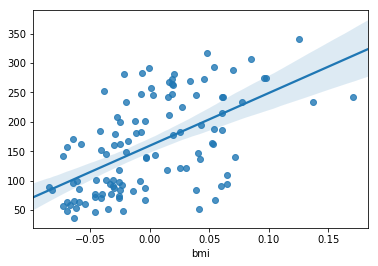

In [8]:
# Plot the regression line and confidence intervals for regression coefficients
regplot(x=test_x.bmi, y=test_y)
matplotlib.pyplot.show()